# Face Mask Detection using Convolutional Neural Networks (CNN)

## Project Description
This project aims to build a Convolutional Neural Network (CNN) model to detect whether a person is wearing a face mask in an image. The dataset used is the **Face Mask Dataset** from Kaggle, which contains images labeled as "with_mask" and "without_mask". The model is trained to classify images into two categories: 
- **With Mask**: Images of people wearing a face mask.
- **Without Mask**: Images of people not wearing a face mask.

### Objectives
- Preprocess the dataset by resizing images to 128x128 pixels and normalizing pixel values.
- Build and train a CNN model to achieve high accuracy in classifying mask-wearing status.
- Enable real-time prediction on new images to determine if a person is wearing a mask.
- Visualize training performance through loss and accuracy plots.

### Dataset
The dataset is sourced from Kaggle (`omkargurav/face-mask-dataset`) and consists of:
- **3,725 images** labeled as "with_mask".
- **3,828 images** labeled as "without_mask".

### Methodology
1. **Data Preprocessing**: Images are resized to 128x128, converted to RGB, and normalized (pixel values scaled to [0,1]).
2. **Model Architecture**: A CNN with multiple convolutional layers, max-pooling, dropout for regularization, and dense layers for classification.
3. **Training**: The model is trained using the Adam optimizer and either sparse categorical crossentropy or binary crossentropy loss.
4. **Evaluation**: Model performance is evaluated on a test set, and results are visualized using loss and accuracy plots.
5. **Prediction**: The trained model can predict the mask-wearing status of new images provided by the user.

### Tools and Libraries
- **Python**: Core programming language.
- **TensorFlow/Keras**: For building and training the CNN model.
- **OpenCV**: For image loading and preprocessing.
- **Matplotlib**: For visualizing images and training metrics.
- **NumPy**: For array operations.
- **Pillow**: For image processing.
- **Scikit-learn**: For train-test splitting and evaluation.

This project can be extended with data augmentation, transfer learning, or additional evaluation metrics to improve performance and robustness.

![Image Description](https://editor.analyticsvidhya.com/uploads/733302.png)

# Importing the Dependencies

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

2025-08-19 12:33:08.401496: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755606788.430186      80 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755606788.438493      80 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Define paths to the dataset

In [2]:
with_mask_path = '/kaggle/input/face-mask-dataset/data/with_mask/'
without_mask_path = '/kaggle/input/face-mask-dataset/data/without_mask/'

# List image files in the dataset

In [3]:
with_mask_files = os.listdir(with_mask_path)
without_mask_files = os.listdir(without_mask_path)

# Print sample file names and dataset sizes

In [4]:
print("Sample with_mask images:", with_mask_files[0:5])
print("Sample without_mask images:", without_mask_files[0:5])
print("Number of with_mask images:", len(with_mask_files))
print("Number of without_mask images:", len(without_mask_files))

Sample with_mask images: ['with_mask_3326.jpg', 'with_mask_3139.jpg', 'with_mask_696.jpg', 'with_mask_2867.jpg', 'with_mask_39.jpg']
Sample without_mask images: ['without_mask_3248.jpg', 'without_mask_2803.jpg', 'without_mask_650.jpg', 'without_mask_2060.jpg', 'without_mask_559.jpg']
Number of with_mask images: 3725
Number of without_mask images: 3828


# Create labels (1 for with_mask, 0 for without_mask)

In [5]:
with_mask_labels = [1] * len(with_mask_files)
without_mask_labels = [0] * len(without_mask_files)
labels = with_mask_labels + without_mask_labels

# Load and preprocess images

In [6]:
data = []
for img_file in with_mask_files:
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128, 128))  
    image = image.convert('RGB') 
    image = np.array(image) 
    data.append(image)

for img_file in without_mask_files:
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Convert image and label lists to numpy arrays

In [7]:
X = np.array(data)
Y = np.array(labels)

# Split data into training and testing sets

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Scale pixel values to [0,1]

In [9]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Set up data augmentation

In [10]:
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train_scaled)

# Build the CNN model

In [11]:
model = keras.Sequential([
    # First convolutional block
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    # Second convolutional block
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    # Third convolutional block
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    # Flatten and dense layers
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.5),
    # Output layer for binary classification
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(Y_train), y=Y_train)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

# Train the model with data augmentation
history = model.fit(
    datagen.flow(X_train_scaled, Y_train, batch_size=32),
    validation_data=(X_test_scaled, Y_test),
    epochs=30
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print(f'Test Accuracy: {accuracy:.4f}')

2025-08-19 12:34:22.848097: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Class Weights: {0: 0.9872549019607844, 1: 1.0130784708249496}
Epoch 1/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 218s 1s/step - accuracy: 0.7005 - loss: 9.9893 - val_accuracy: 0.5586 - val_loss: 6.9338
Epoch 2/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.7340 - loss: 5.7904 - val_accuracy: 0.7346 - val_loss: 3.0684
Epoch 3/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 188s 996ms/step - accuracy: 0.7890 - loss: 2.7166 - val_accuracy: 0.8676 - val_loss: 1.7990
Epoch 4/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.8166 - loss: 1.7952 - val_accuracy: 0.8557 - val_loss: 1.4570
Epoch 5/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.8219 - loss: 1.5168 - val_accuracy: 0.8617 - val_loss: 1.3748
Epoch 6/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 188s 992ms/step - accuracy: 0.8481 - loss: 1.3051 - val_accuracy: 0.7035 - val_loss: 1.4372
Epoch 7/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.8655 - loss: 1.1280 - val_accuracy: 0.6744 - val_loss: 1.2276
Epoch 8/30
189/189 ━━━━━━━━━━

# Plot training and validation loss

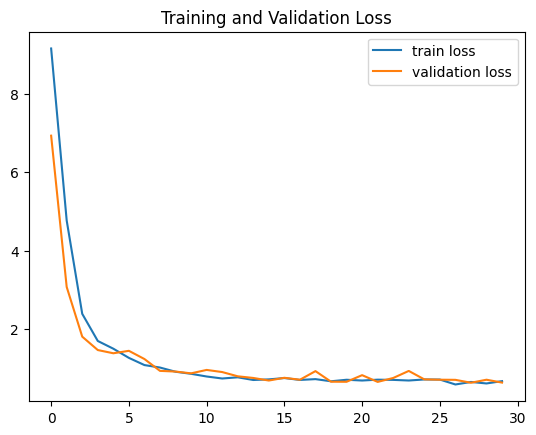

In [12]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy

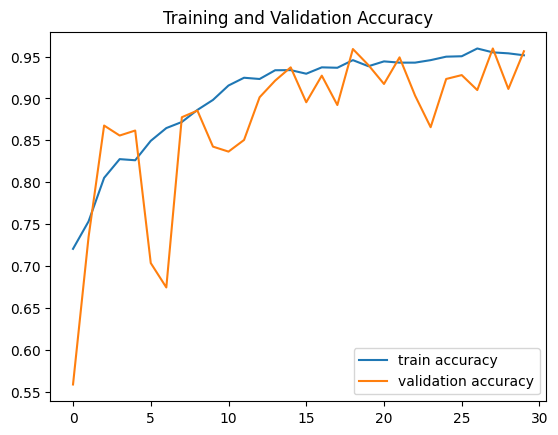

In [13]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Predict on a single image

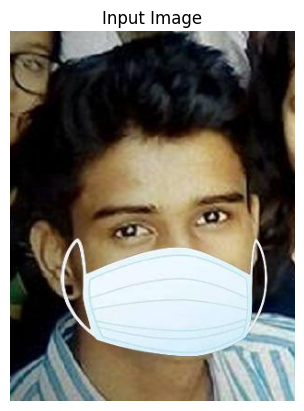

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
Prediction Probability: [[0.97415733]]
Predicted Label: 1
The person in the image is wearing a mask


In [14]:
input_image_path = '/kaggle/input/face-mask-dataset/data/with_mask/with_mask_1000.jpg'
input_image = cv2.imread(input_image_path)
if input_image is None:
    print("Error: Could not load the image. Please check the file path.")
else:
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Input Image')
    plt.show()
    input_image_resized = cv2.resize(input_image, (128, 128))
    input_image_scaled = input_image_resized / 255
    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])
    input_prediction = model.predict(input_image_reshaped)
    input_pred_label = (input_prediction > 0.7).astype(int)[0][0]  # Adjusted threshold to 0.7
    print('Prediction Probability:', input_prediction)
    print('Predicted Label:', input_pred_label)
    print('The person in the image is', 'wearing a mask' if input_pred_label == 1 else 'not wearing a mask')

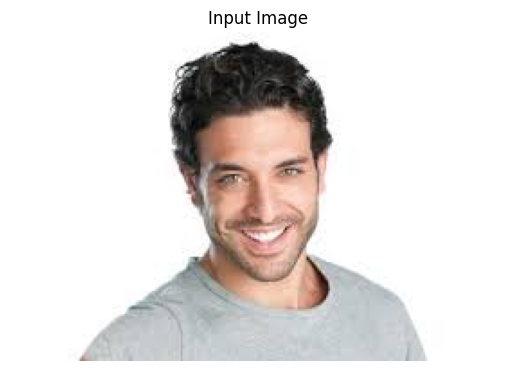

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Prediction Probability: [[0.93198353]]
Predicted Label: 0
The person in the image is not wearing a mask


In [15]:
# Test with a without_mask image
input_image_path = '/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1000.jpg'
input_image = cv2.imread(input_image_path)
if input_image is None:
    print("Error: Could not load the image. Please check the file path.")
else:
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Input Image')
    plt.show()
    input_image_resized = cv2.resize(input_image, (128, 128))
    input_image_scaled = input_image_resized / 255
    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])
    input_prediction = model.predict(input_image_reshaped)
    input_pred_label = (input_prediction > 0.95).astype(int)[0][0]  # Increased threshold to 0.95 for without_mask
    print('Prediction Probability:', input_prediction)
    print('Predicted Label:', input_pred_label)
    print('The person in the image is', 'wearing a mask' if input_pred_label == 1 else 'not wearing a mask')

# Save the model 

In [28]:
model.save('/kaggle/working/face_mask_model.h5')